In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import scipy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense


## Load the dataset 

In [4]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

fatal: destination path 'HodaDatasetReader' already exists and is not an empty directory.


In [5]:
from HodaDatasetReader.HodaDatasetReader import read_hoda_dataset
train_images, train_labels = read_hoda_dataset('./HodaDatasetReader/DigitDB/Train 60000.cdb',images_height=32, images_width=32, one_hot=True, reshape=False)
test_images, test_labels = read_hoda_dataset('./HodaDatasetReader/DigitDB/Test 20000.cdb' ,images_height=32, images_width=32, one_hot=True, reshape=False)


<ipython-input-4-5db87576d8f8>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  figure.add_subplot(3, 3, i)


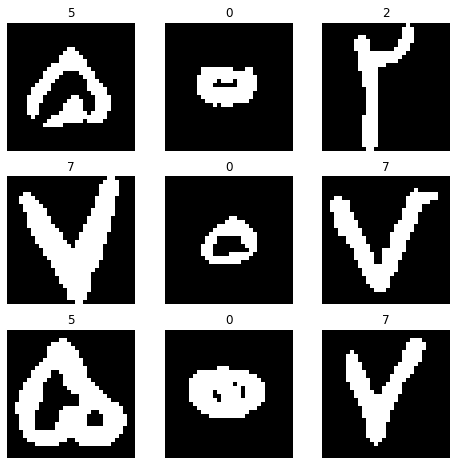

In [4]:
figure = plt.figure(figsize=(8, 8))
figure.add_subplot(3, 3, 1)
for i in range(1, 10):
    sample_img , sample_lbl = train_images[i], np.argmax(train_labels[i])
    figure.add_subplot(3, 3, i)
    plt.title(sample_lbl)
    plt.axis("off")
    plt.imshow(sample_img[:,:,0],  cmap="gray")
plt.show()

# Build the model

In [7]:
class MyModel(tf.keras.Model):
  def __init__(self):
    
    # Call the superclass constructor
    super().__init__()
    
    #define your network layers here
    self.conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 1))
    
    # Add a max pooling layer with pool size 2
    self.maxpool1 = tf.keras.layers.MaxPooling2D(2)
    self.conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu')
    
    # Add a max pooling layer with pool size 2
    self.maxpool2 = tf.keras.layers.MaxPooling2D(2)
    
    # Flatten the output of the convolutional layers
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(128, activation='relu')
    
    # Add a dense layer with 10 units and a softmax activation function
    self.dense2 = tf.keras.layers.Dense(10, activation='softmax')
    
  def call(self, inputs, training=False):
    #pass forward the inputs the return the output
    
    # Pass the input through the convolutional layers and max pooling layers
    x = self.conv1(inputs)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.maxpool2(x)
    
    # Flatten the output of the convolutional layers
    x = self.flatten(x)
    
    # Pass the output through the dense layers
    x = self.dense1(x)
    
    # return output
    return self.dense2(x)


In [8]:
model = MyModel()
model.build(input_shape=(None, 32,32,1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  295

# Now compile and fit the model 

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.fit(x=train_images, y=train_labels, validation_split=0.1, batch_size=64, epochs=5, shuffle=True)

Epoch 1/5
844/844 [==============================] - 62s 72ms/step - loss: 0.0988 - accuracy: 0.9708 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 2/5
844/844 [==============================] - 60s 72ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 3/5
844/844 [==============================] - 59s 70ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 70s 83ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0321 - val_accuracy: 0.9917
Epoch 5/5
844/844 [==============================] - 59s 70ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0265 - val_accuracy: 0.9927


# Now, lets test the model

test your model with the test data

In [11]:
# Load the image using cv2.imread
image0 = cv2.imread('image0.jpg')
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')
image3 = cv2.imread('image3.jpg')
image4 = cv2.imread('image4.jpg')
image5 = cv2.imread('image5.jpg')
image6 = cv2.imread('image6.jpg')
image7 = cv2.imread('image7.jpg')
image8 = cv2.imread('image8.jpg')
image9 = cv2.imread('image9.jpg')

# Assign the images to the test_images variable
test_images = [image0, image1, image2, image3, image4, image5, image6, image7, image8, image9]

In [12]:
def preprocess_images(images):
  # Convert the images to grayscale
  images = tf.image.rgb_to_grayscale(images)
  # Normalize the pixel values
  images = tf.image.per_image_standardization(images)
  # Resize the images to a uniform size
  images = tf.image.resize(images, (32, 32))
  return images


In [13]:
# Preprocess the test images
x_test = preprocess_images(tf.convert_to_tensor(test_images))

In [14]:
# Make predictions on the test images
predictions = model.predict(x_test)

# Convert the predictions to a list of predicted classes
predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 111ms/step


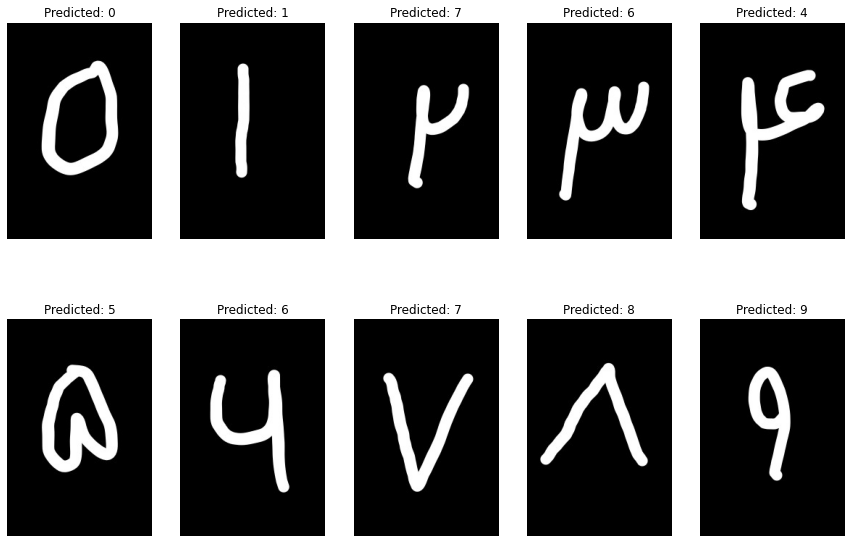

In [15]:
# Set the figure size
plt.figure(figsize=(15,10))

# Loop over the test images and their predictions
for i, (image, prediction) in enumerate(zip(test_images, predicted_classes)):
  # Determine the predicted class
  predicted_class = prediction

  # Convert the image to a NumPy array
  image = np.array(image)

  # Plot the image and the prediction
  plt.subplot(2, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.title("Predicted: {}".format(predicted_class))
  plt.axis('off')

# Show the plot
plt.show()


# Spatial Transformer

In [8]:
class SpatialTransformerCNN:
  def __init__(self, input_x, input_y, num_classes):
    # Save the input tensors
    self.input_x = input_x
    self.input_y = input_y

    # Create the spatial transformer layers
    st1 = tf.keras.layers.Conv2D(16, 3, activation='relu', name='st1')(self.input_x)
    st2 = tf.keras.layers.Conv2D(16, 3, activation='relu', name='st2')(st1)
    st3 = tf.keras.layers.Conv2D(2, 3, activation='relu', name='st3')(st2)
    self.st_output = st3

    # Compute the transformation matrix
    self.transform_matrix = self.st_output[:,:,:,:2]
    self.transform_matrix = tf.reshape(self.transform_matrix, (-1, 2, 2))

    # Apply the transformation
    # Scale the image
    scale = self.transform_matrix[:,0,0]
    scaled_input = tf.image.resize(self.input_x, size=tf.cast(tf.shape(self.input_x)[1:3] * scale, tf.int32))

    # Rotate the image
    angle = tf.atan2(self.transform_matrix[:,1,0], self.transform_matrix[:,1,1])
    rotated_input = tf.image.rotate(scaled_input, angles=angle)

    # Flatten the transformed input and feed it into a fully connected layer
    flat = tf.keras.layers.Flatten()(rotated_input)
    fc1 = tf.keras.layers.Dense(512, activation='relu')(flat)
    self.logits = tf.keras.layers.Dense(num_classes)(fc1)

    # Compute the loss and accuracy
    self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.input_y))
    self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
    self.train_op = self.optimizer.minimize(self.loss)
    self.predictions = tf.argmax(self.logits, 1)
    correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
    self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [ ]:
# Create the SpatialTransformerCNN model
num_classes = train_labels.shape[1]
model = SpatialTransformerCNN(train_images, train_labels, num_classes)

In [ ]:
# Loop over the number of training epochs
num_epochs = 10
for epoch in range(num_epochs):
  # Shuffle the training data
  indices = np.random.permutation(train_images.shape[0])
  train_images = train_images[indices]
  train_labels = train_labels[indices]

  # Loop over the training batches
  for i in range(0, train_images.shape[0], 64):
    # Get the training batch
    batch_x = train_images[i:i+64]
    batch_y = train_labels[i:i+64]

    # Train the model on the batch
    _, loss, accuracy = model.sess.run([model.train_op, model.loss, model.accuracy], feed_dict={input_x: batch_x, input_y: batch_y})

  # Print the loss and accuracy for the epoch
  print('Epoch {}: loss = {}, accuracy = {}'.format(epoch, loss, accuracy))

# Test the model on the test data
accuracy = model.sess.run(model.accuracy, feed_dict={input_x: test_images, input_y: test_labels})
print('Test accuracy: {}'.format(accuracy))

# Close the tensorflow session
model.close()